# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#DataSet
url = "https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv"
df = pd.read_csv(url)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Revisión generalizada de nuestros datos

In [3]:
# Revisaremos tipos de datos, filas y columnas. Fase exploratoria.
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

(48895, 16)

In [4]:
#Convertimos el id en el índice principal del dataframe.
df.set_index(['id'], inplace = True)

In [5]:
#Revisaremos columnas y filas del dataframe
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
#Revisión si hay valores únicos. Revisar si existen variables con un único valor a lo largo de la data.
v_uniques = df.nunique()
v_uniques

name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366
dtype: int64

##### **Observaciones de las apreciaciones cualitativas**
Con la detección de valores únicos por filas identificamos posibles variables categóricas, binarias o de valor constante en todo el DataSet. En ella observamos las variables 'room_type' y 'neighbourhood_group' cuyos valores oscilan entre 3 y 5. Revisaremos mas adelante para asignar valores numéricos a las categorías si así se requiere.

#### Revisión de filas duplicadas

In [7]:
#Revisión de filas duplicadas:
df.duplicated().sum()

np.int64(0)

In [8]:
#Revisaremos si por columnas existen valores repetidos (filas duplicadas) y mantendremos aquellos con los que se repiten.
df.T.duplicated(keep=False)

name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

#### Revisión de faltantes

In [9]:
#Revisar valores faltantes (en porcentaje) para su posterior exclusión de la data.
df.isnull().mean()*100

name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

#### **Observaciones de las apreciaciones cualitativas**
Existen más del 20% de valores faltantes en las columnas 'last_review' y 'reviews_per_month' serán sujeto de estudios de patrones para verificar si están correlacionadas y tomar alguna decisión si permanecen o no en el estudio. Por otra parte, 'name' y 'host_name' tienen menos del 1% de datos faltantes. 

<Axes: >

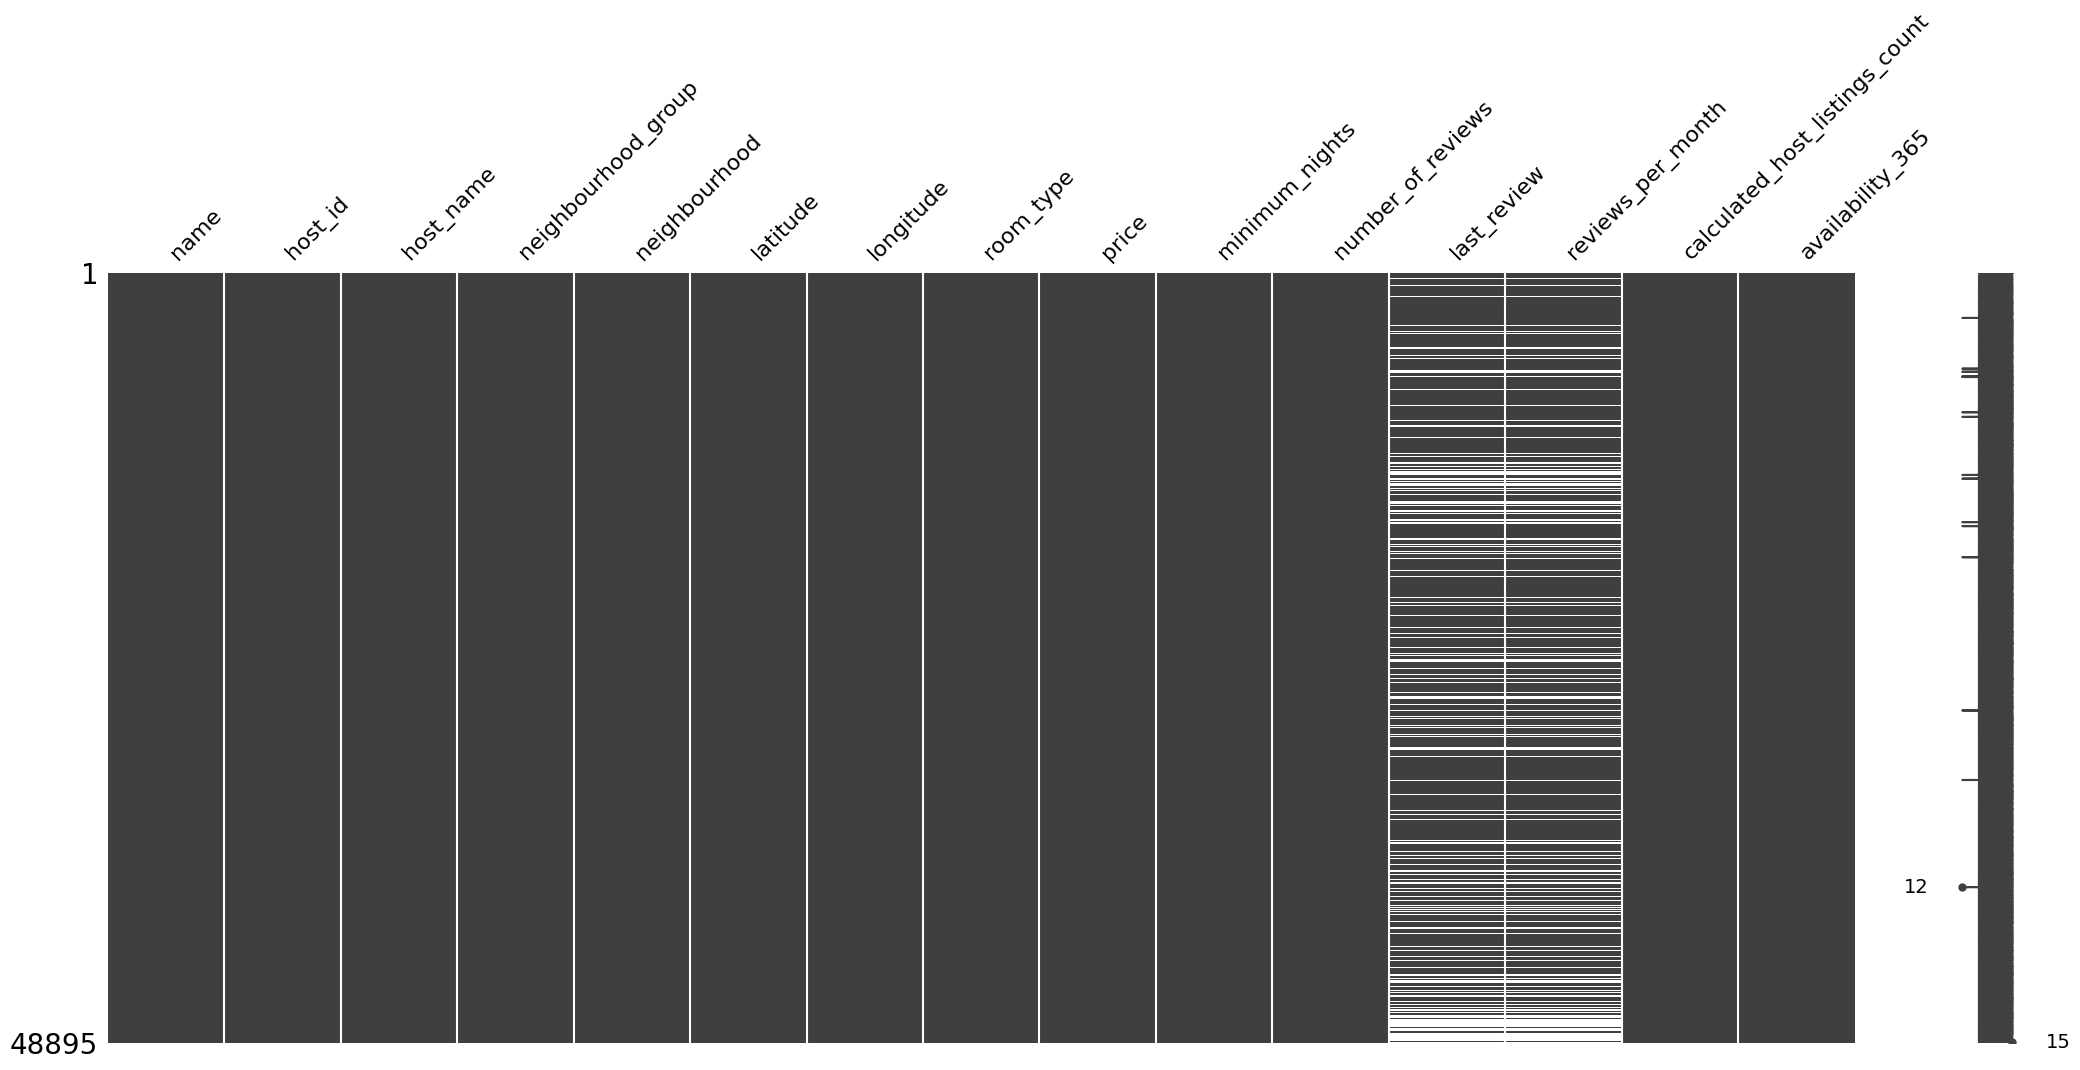

In [10]:
#Revisaremos las columnas con last_review y reviews_per_month por si siguen un patrón de faltantes. 
msno.matrix(df)

#### **Observaciones:**
Dado este patrón, merece la pena revisar si existe algún patrón de colinealidad entre ellas para determinar si merece la pena quedarme con una de ellas o imputar. Considerando que el faltante es más del 20%, imputar podría generar muchos valores artificiales en nuestra matriz, por ende, podríamos revisar si existe relación entre ellas y luego sobre la variable de interés para tomar una decisión. Sin embargo, la columna 'last_review' presenta datos de 'fechas' sobre los que deberíamos aplicar una modificación de la presentación de los datos para su análisis. Dado el tiempo de evaluación y la cantidad faltante, no la incluiré en el estudio.

Entendiendo que, si la última review hecha en el inmueble fue en febrero de un año determinado, es de esperar que 'reviews_per_month' registre los faltantes en las mismas fechas que la variable 'last_review'. Así que asumiré que ambas variables están directamente relacionadas, ahora ¿qué tanta relación pueden guardar con la variable objetivo?

#### Análisis de correlación

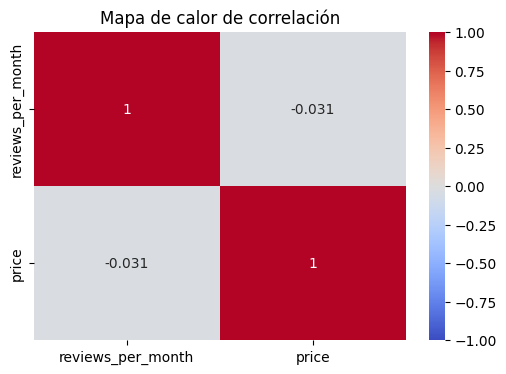

In [11]:
#Analizaré si existe correlación entre la variable reviews_per_month sobre nuestra variable objetivo (price):

#Selección de variables (columnas en estudio)
var_corr = ['reviews_per_month', 'price']
df_var_filtered = df[var_corr].dropna() #eliminaremos valores faltantes

#Calculamos matriz de correlación
corr = df_var_filtered.corr()

#Plot de correlaciones 
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Mapa de calor de correlación')
plt.show()

#### **Observaciones:** 
Una vez obtenido este mapa de correlaciones entre 'reviews_per_month' y 'price' siendo los coeficientes muy inferiores a 1, podriamos suponer que la correlación existente entre ellas es nula o muy débil. Esta vez, supondré que last_review se comporta igual, así que tampoco la consideraré en el estudio. Además teniendo la variable 'number_of_reviews', conservarlas sería redundante. 

## Revisión Cualitativa de Variables de interés

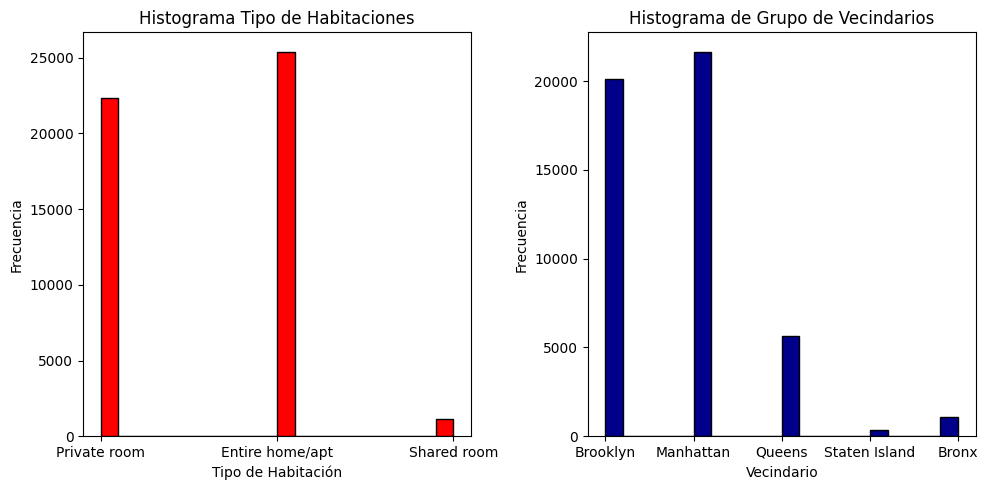

In [12]:
#Visualización de variables univariantes o categóricas:
# Creamos una figura con dos subplots (dos histogramas)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(df['room_type'], bins=20, color='red', edgecolor='black')
ax[0].set_title('Histograma Tipo de Habitaciones')
ax[0].set_xlabel('Tipo de Habitación')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].hist(df['neighbourhood_group'], bins=20, color ='darkblue', edgecolor='black')
ax[1].set_title('Histograma de Grupo de Vecindarios')
ax[1].set_xlabel('Vecindario')
ax[1].set_ylabel('Frecuencia')

# Mostrar la figura
plt.tight_layout()
plt.show()

#### **Observaciones:**
En términos generales, hay mayor cantidad de habitaciones privadas y apartamentos enteros que habitaciones compartidas.
Hay muchísimas más ofertas de airbnb en Brooklyn y Manhattan que en Staten Island o Bronx. Las primeras localidades encabezan la lista de airbnb disponibles.

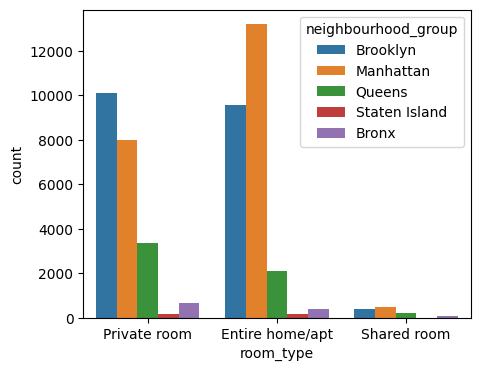

In [13]:
# Revisión de variables categóricas cantidad de tipos de viviendas por vecindario:

fig, axis = plt.subplots(figsize = (5, 4))
sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group")
plt.show()

#### **Observaciones**

La mayor proporción de viviendas para alquilar se encuentran en Manhattan y notablemente más en apartamentos completos. El segundo mayor vecindario seria Brooklyn, pero a diferencia de Manhattan, suelen haber más del tipo de habitaciones privadas. Cabría preguntarse si Manhattan podría ser una zona de visitas de larga estancia para grupos familiares y quizás Brooklyn algo más de paso.

Por otra parte Queens, Bronx y Staten Island tienen muchísimas menos ofertas habitacionales frente a las dos mencionadas anteriormente. Podría haber algún factor socio-cultural o socioeconómico que podría afectar la disponibilidad de complejos habitacionales en estas zonas. Recordando además la limitación geográfica de Staten Island.

### Eliminación de columnas poco relevantes para el estudio

In [14]:
#Eliminaré las columnas que considero redundantes y de poco interés para el estudio: last_review, reviews_per_month,host_name
df_drop1 = df.drop(columns=['neighbourhood','last_review','reviews_per_month','host_name','name', 'host_id'])
df_drop1

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
id,,,,,,,,,
2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365
2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
3647,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365
3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...
36484665,Brooklyn,40.67853,-73.94995,Private room,70,2,0,2,9
36485057,Brooklyn,40.70184,-73.93317,Private room,40,4,0,2,36
36485431,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,1,27


In [15]:
#Guardado el nuevo DataFrame sin estas columnas mencionadas
df_drop1.to_csv('df_modificado1.csv', index=False)

#### **Observaciones:**
Eliminaremos variables como 'host_name' y 'name' porque considero que no son valores de importancia por su condición de etiqueta específica que no tendrá mayor aporte para el estudio predictivo, adicionalmente eliminaré la columna 'neighbourhood' porque decidí quedarme con los grupos para darle un sentido más didáctico y generalizado. 

### Transformación de variables categóricas a numéricas

In [16]:
#Transformar variables categóricas en variables numéricas (neighbourhood_group y room_type) para ajuste al modelo predictivo

#Usamos LabelEncoder (para mas categorias no binarias)
nei_encoder = LabelEncoder()
room_encoder = LabelEncoder()
df_drop1['neighbourhood_group_encode']= nei_encoder.fit_transform(df_drop1['neighbourhood_group'])

#Transformar variable categórica de room_type a números
df_drop1['room_type_encode'] = room_encoder.fit_transform(df_drop1['room_type'])
df_drop1.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encode,room_type_encode
id,,,,,,,,,,,
2539,Brooklyn,40.64749,-73.97237,Private room,149,1,9,6,365,1,1
2595,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2,355,2,0
3647,Manhattan,40.80902,-73.94190,Private room,150,3,0,1,365,2,1
3831,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,1,194,1,0
5022,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,1,0,2,0


#### **Observaciones**
De ha empleado el métoco de LabelEncoder por el simple hecho de la naturaleza de nuestras variables categóricas, al no ser ordinales y tampoco con una condición binaria, el hecho de considerar re-etiquetarlas con números, hace simple la selección de este método. 

In [17]:
#Identificadores numéricos de cada categoria:

neighbourhood_map = dict(zip(nei_encoder.classes_, nei_encoder.transform(nei_encoder.classes_)))
room_map = dict(zip(room_encoder.classes_, room_encoder.transform(room_encoder.classes_)))

print(neighbourhood_map)
print(room_map)

{'Bronx': np.int64(0), 'Brooklyn': np.int64(1), 'Manhattan': np.int64(2), 'Queens': np.int64(3), 'Staten Island': np.int64(4)}
{'Entire home/apt': np.int64(0), 'Private room': np.int64(1), 'Shared room': np.int64(2)}


#### **Observaciones**
Guardamos un nuevo DataFrame con las columnas nuevas porque editarlas sobre sí mismas me genera un error numérico como si me estuviese sumando caracteres. Más adelante en el estudio tendré que reducirlas para no incluir variables categóricas.

### Generaremos un nuevo DataFrame solo con todas las variables numéricas

In [18]:
#Eliminamos las columnas categóricas que no seran usadas en el nuevo DataSet:
df_def = df_drop1.drop(columns = ['neighbourhood_group', 'room_type'])
df_def

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encode,room_type_encode
id,,,,,,,,,
2539,40.64749,-73.97237,149,1,9,6,365,1,1
2595,40.75362,-73.98377,225,1,45,2,355,2,0
3647,40.80902,-73.94190,150,3,0,1,365,2,1
3831,40.68514,-73.95976,89,1,270,1,194,1,0
5022,40.79851,-73.94399,80,10,9,1,0,2,0
...,...,...,...,...,...,...,...,...,...
36484665,40.67853,-73.94995,70,2,0,2,9,1,1
36485057,40.70184,-73.93317,40,4,0,2,36,1,1
36485431,40.81475,-73.94867,115,10,0,1,27,2,0


In [19]:
#Guardamos el nuevo DataSet con todas las variables numéricas:
df_def.to_csv('df_definitivo_numerico.csv', index=False)

### Revisión cualitativa de algunas variables en el DataFrame

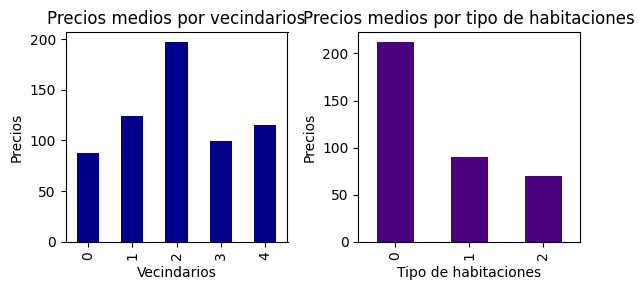

In [20]:
#Análisis variables numérico - categóricas (visualización de datos)
#Gráfico de precio por grupos de vecindarios:

price_neighbourhood = df_def.groupby('neighbourhood_group_encode')['price'].mean() #agrupamos datos de precios por vecindarios
data_price_neighbourhood = pd.DataFrame(price_neighbourhood) 
data_price_neighbourhood.to_csv('data_price_neighbourhood.csv', index = False) #guardado del dataframe en modificaciones.


fig, axis = plt.subplots(1, 2, figsize = (6, 3)) #genero subplot para poder ver mas de un gráfico.

#Gráfico de precio de acuerdo al vecindario:
price_neighbourhood.plot(kind='bar', color ='darkblue', ax=axis[0])
axis[0].set_title('Precios medios por vecindarios')
axis[0].set_xlabel('Vecindarios')
axis[0].set_ylabel('Precios')

#Gráfico de precio por tipo de habitación:
price_room_type = df_def.groupby('room_type_encode')['price'].mean()

price_room_type.plot(kind='bar', color= 'indigo', ax=axis[1])
axis[1].set_title('Precios medios por tipo de habitaciones')
axis[1].set_xlabel('Tipo de habitaciones')
axis[1].set_ylabel('Precios')

plt.tight_layout()
plt.show()

#### **Observaciones:** 
Está claro que la distribución de precios varía en función de la zona del Airbnb (el vecindario) y el tipo de habitaciones para rentar. Aparentemente la zona más cara para alquilar es Manhattan y la zona más económica el Bronx.
Por otra parte, alquilar un apartamento entero siempre será más costoso que rentar por habitaciones compartidas. 

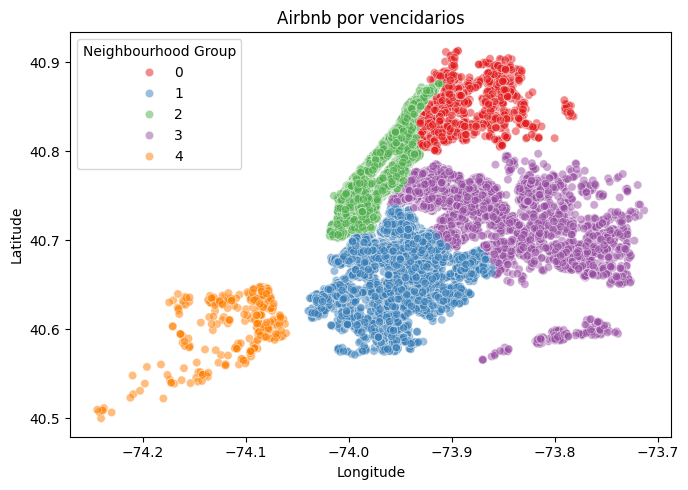

In [21]:
#Evaluación gráfica de la distribución de propiedades por zonas geográficas a partir de 

plt.figure(figsize=(7, 5))
sns.scatterplot(data= df_def, x='longitude', y='latitude', hue='neighbourhood_group_encode', alpha=0.5, palette='Set1')
plt.title('Airbnb por vencidarios')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Neighbourhood Group')
plt.tight_layout()
plt.show()

#### **Observaciones**
Con ayuda de este plot/mapping, es evidente alguna de las características que he descrito inicialmente en las revisiones cualitativas. La mayoría de complejos habitacionales se encuentran entre las 3 zonas más céntricas del espacio geográfico dibujado (Manhattan, Queens y Staten Island)

### Evaluación de otras variables y sus comportamientos

In [22]:
#Revisión de valores únicos en la variable host_listings_counts. 
print(f"Los valores únicos en host_listing_count son: {df_def['calculated_host_listings_count'].nunique()}")

Los valores únicos en host_listing_count son: 47


#### **Observaciones:**
Existen sólo 47 valores distintos entre el listado de propiedades contadas por host. No obstante, me gustaría revisar cuáles son los valores que aparecen con más frecuencia sobre la data. 

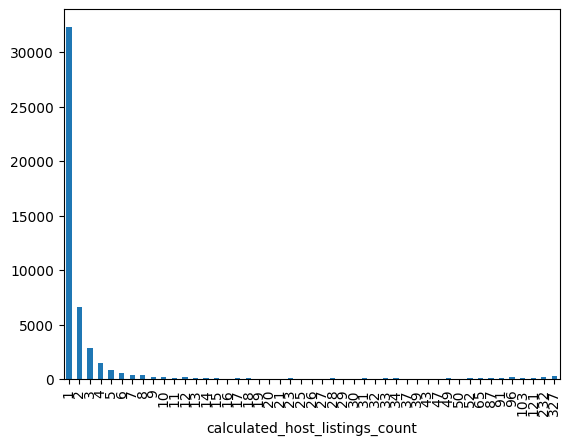

In [23]:
#Grafico de histograma para host_listing_counts:
counts = df_def['calculated_host_listings_count'].value_counts().sort_index()
counts.plot(kind='bar')
plt.show()

#### **Observaciones**
Lo primero que podemos observar es que, en su mayoría, más del 50% de la data consiste en hosts que tienen 1 solo airbnb publicado. Podríamos inferir que quienes suelen rentar pueden tener un perfil particular contra algunos pocos que tiene  entre 30 y más de 100 inmuebles a su cargo.

### Análisis descriptivo de las variables a considerar en el estudio

In [24]:
#Genera matriz de análisis descriptivo por columna para ver comportamiento de las variables en estudio (matriz transpuesta):
df_def.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000
neighbourhood_group_encode,48895.0,1.675345,0.735816,0.00000,1.00000,2.00000,2.000000,4.00000
room_type_encode,48895.0,0.504060,0.545379,0.00000,0.00000,0.00000,1.000000,2.00000


#### **Observaciones:**
En esta tabla podemos observar algunos valores atípicos en nuestras columnas de 'price', yendo de cero a 10.000$. Por otra parte, podemos ver cómo la característica 'minimum_nights' pasa de 1 a 1250 noches, cosas que sólo tendría sentido si fuera una villa vacacional y se alquilara de forma masiva para un alto número de personas (cosa que podría justificar un precio altamente elevado). 

Aún conservo dudas cómo se lee la característica 'availability_365', tomando en cuenta que es disponibilidad del airbnb a lo largo del año (recabando la información del último año)
 

In [25]:
#Revisión de precios en cero y posible identificación de patrones
df_def[df_def['price'] == 0]

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encode,room_type_encode
id,,,,,,,,,
18750597,40.69023,-73.95428,0,4,1,4,28,1,1
20333471,40.83296,-73.88668,0,2,55,4,127,0,1
20523843,40.69467,-73.92433,0,2,16,5,0,1,1
20608117,40.72462,-73.94072,0,2,12,2,0,1,1
20624541,40.70838,-73.94645,0,5,3,1,73,1,0
20639628,40.68173,-73.91342,0,1,93,6,176,1,1
20639792,40.68279,-73.91170,0,1,95,6,232,1,1
20639914,40.68258,-73.91284,0,1,95,6,222,1,1
20933849,40.75091,-73.97597,0,3,0,1,0,2,0


In [26]:
# Revisión de precios en cero por vecindarios:
zero_price_neighbourhood = df_def[df_def['price'] == 0]
zp_neighbourhood = zero_price_neighbourhood['neighbourhood_group_encode'].value_counts()
zp_neighbourhood

neighbourhood_group_encode
1    9
0    1
2    1
Name: count, dtype: int64

#### **Observaciones**
Aparentemente, los valores de precio 'cero' no coinciden con ninguna característica relevante en el DataSet. Son 11 valores que no siguen un patrón aparente. La mayoría de valores ceros aparecen mayoritariamente en el vecindario de Brooklyn, donde existen minimos por noche diferentes y no coincide el id. 

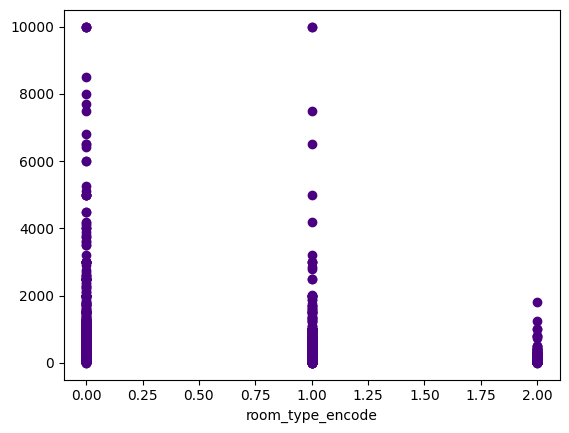

In [27]:
#Grafico de precios por tipo de habitación. Identificación de valores outliers por tipo de habitación. 
x = df_def['room_type_encode']
y = df_def['price']

plt.scatter(x, y, color ='indigo')
plt.xlabel('room_type_encode')
plt.show()

#### **Observaciones:**
La mayoría de precios que superan los 1000$, tienen que ver con alquilar un apartamento entero. Desconocemos las unidades sobre las que está medida la variable 'price' puesto que podría suponer que es por noche o por alguna otra cantidad de tiempo. En estos gráficos es notorio algunos valores que salen del grueso de datos tanto en alquileres de apartamentos enteros como habitación privada. 

In [28]:
# Revisión de precios para más de 1000 por tipo de habitaciones (outliers)
df_def.loc[df_def['price'] > 9000]

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encode,room_type_encode
id,,,,,,,,,
4737930,40.79264,-73.93898,9999,5,1,1,0,2,0
7003697,40.76810,-73.91651,10000,100,2,1,0,3,1
9528920,40.71355,-73.98507,9999,99,6,1,83,2,1
13894339,40.73260,-73.95739,10000,5,5,1,0,1,0
22436899,40.77213,-73.98665,10000,30,0,1,83,2,0
31340283,40.71980,-73.98566,9999,30,0,1,365,2,0


#### **Observaciones**
Las filas que contienen estos precios fuera del patrón común sólo coinciden en dos vecindarios. Podría llamar la atención cómo algunos de estos valores también son correspondidos con 'availability_365' = 0, que podría indicarnos disponibilidad de los pasados 365 dias del año (o los próximos), cabría suponer que no están disponibles, son publicaciones sin propósito de rentar, el hospedador no está interesado en rentarlo o simplemente un error humano en la toma de datos. 

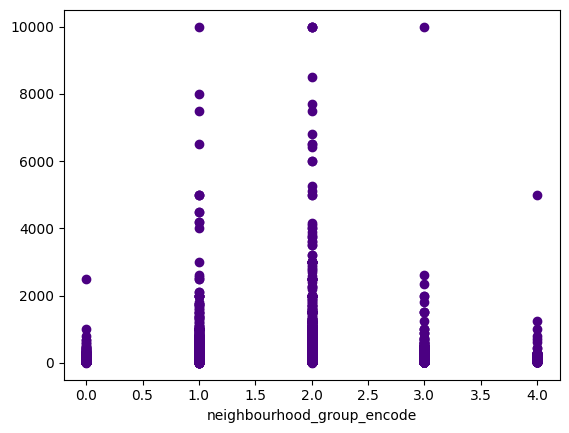

In [29]:
#Grafico de precios por vecindarios:

x = df_def['neighbourhood_group_encode']
y = df_def['price']

plt.scatter(x, y, color = 'indigo')
plt.xlabel('neighbourhood_group_encode')
plt.show()

In [30]:
df_def[df_def['minimum_nights']>800]

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encode,room_type_encode
id,,,,,,,,,
1615764,40.71239,-74.01620,400,1000,0,1,362,2,0
4204302,40.73293,-73.99782,180,1250,2,1,365,2,0
10053943,40.82915,-73.94034,99,999,2,1,42,2,0
20990053,40.71772,-73.95059,79,999,24,6,249,1,1
30378211,40.73094,-73.99900,110,999,0,1,365,2,2


#### **Observaciones**
Tal como en el ejemplo anterior, rentar un mínimo de noches superior a 800 carece de mucho sentido si no se trata de un complejo de lujo con un sinfin de habitaciones y condiciones muy específicas. Aún asi, no considero que sea cuestión de azar o mal reportaje el '999' en algunos de ellos. Como valor adicional ninguno coincide en id, pero si en su mayoría a un vecindario concreto (Queens) siendo puras habitaciones privadas. 

Para alquilar una habitación privada con un mínimo de 1000 noches (casi 3 años) por 400$, podría esperarse que fuera por una muy larga estancia, aún asi, no es un patrón común del sector ni del tipo de habitación por la zona. 

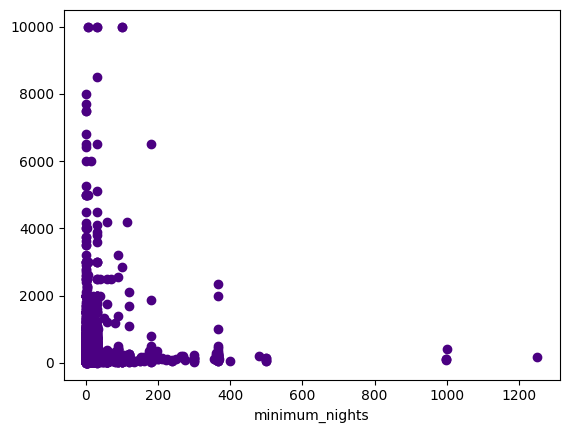

In [31]:
#Grafico de precios por minimo de noches:

x = df_def['minimum_nights']
y = df_def['price']

plt.scatter(x, y, color = 'indigo')
plt.xlabel('minimum_nights')
plt.show()

#### **Observaciones**
Para el mínimo de valores por noche (cercanos a 1) hay una variedad muy grande de precios, incluidos 10000$, así como precios muy bajos para mínimo de noches muy altos, ambos patrones extremos me parecen que no tienen mucho sentido. Bien sea por azar o por una mala toma de datos, son valores que acotaré y estandarizaré para poder trabajar con el comportamiento del atrón común del resto de valores.

## Visualización descriptiva de variables de interés en el modelo

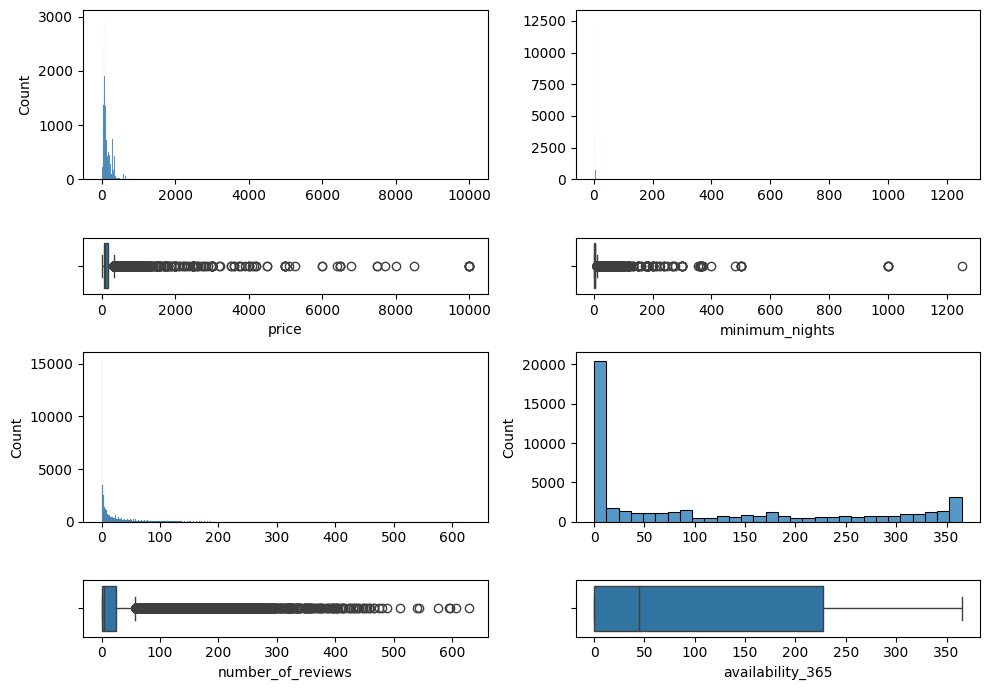

In [32]:
#Visualización de variables numéricas de interés en nuestro modelo:

fig, axis = plt.subplots(4, 2, figsize = (10, 7), gridspec_kw={'height_ratios': [3,1,3,1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")
sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")
sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")
sns.histplot(ax = axis[2, 1], data = df, x = "availability_365").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "availability_365")

plt.tight_layout()
plt.show()

### Estandarización de categorías (variables) para su procesamiento en el modelo

In [33]:
#Ajustar variables para estudio con muchos outliers y distribución distinta:
df_def['log_price'] = np.log1p(df_def.price) #Logaritmo de x+1, puesto que existen valores = 0. 

In [34]:
#Utilizamos 'clip' para acotar los valores de la variable 'minimum_nights' para poder trabajar con valores mejor distribuidos
df_def['clip_minimum_nights'] = df_def['minimum_nights'].clip(lower = 1, upper = 600)

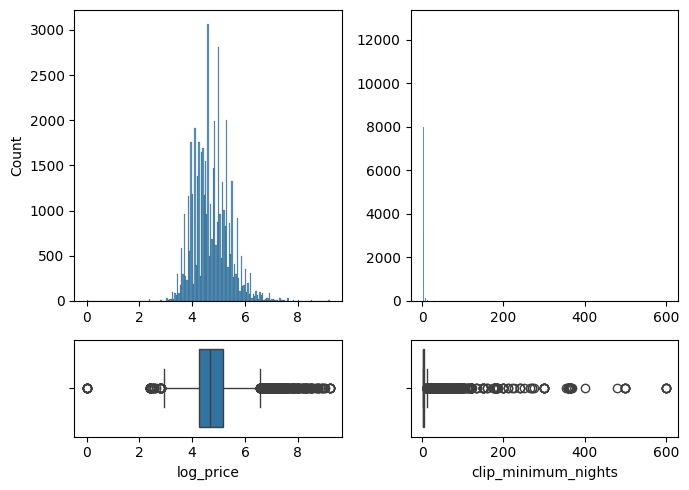

In [35]:
#Visualización de variables numéricas estandarizadas (minimum_nights y price):

fig, axis = plt.subplots(2, 2, figsize = (7, 5), gridspec_kw={'height_ratios': [3,1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = df_def, x = "log_price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df_def, x = "log_price")
sns.histplot(ax = axis[0, 1], data = df_def, x = "clip_minimum_nights").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axis[1, 1], data = df_def, x = "clip_minimum_nights")

plt.tight_layout()
plt.show()

## Partición de datos:

In [36]:
#Partición de datos. Definir X-train y X-test
X = df_def.drop(['log_price','price','minimum_nights'],axis=1)
y = df_def['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#Tamaño del X-Train (Conserva el 80% de los datos)
X_train.shape

(39116, 8)

In [38]:
#Tamaño del X-test (Conserva el 20% de los datos)
X_test.shape

(9779, 8)

### Observaciones Influyentes

In [39]:
# Ajustaremos el modelo
X_train_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_const).fit()

# Instancia de la influencia y obtención de la distancia de cook para cada observación (asumiendo que el modelo será de regresión)
cooks_distance = model.get_influence().cooks_distance

#### **Observaciones**
Se emplea Distancia de Cook porque trabajamos con un modelo de regresión para el conjunto de datos establecidos en la prueba. Sin embargo, aunque no preferentemente, se podría haber utilizado la distancia de Mahalanobis (aunque no sea de especial influencia en regresiones)

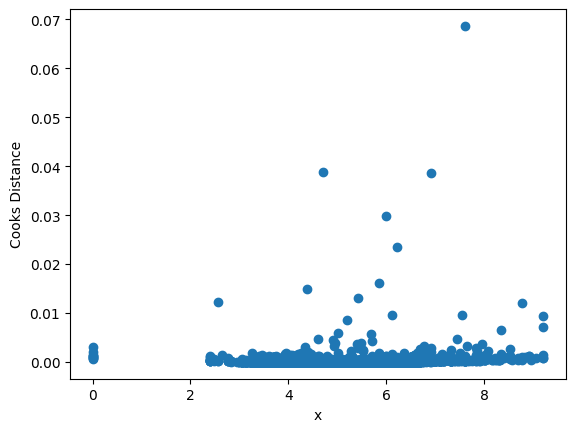

In [40]:
# Ploteamos las distancias calculadas
plt.scatter(y_train, cooks_distance[0])
plt.xlabel('x')
plt.ylabel('Cooks Distance')
plt.show()

In [41]:
#Punto de evaluación para el coeficiente 'cook_distance'
pto_d = 4/len(X_train)
pto_d

0.00010225994477962981

In [42]:
#Ubicar fila que tiene ese valor 'cook_distance' fuera del patrón del resto de datos:
np.where(cooks_distance[0]>0.06)[0]

array([13646])

In [43]:
#Revisamos qué datos tienen las columnas de esa fila que la hace tan atípica:
X_train.iloc[13646]

latitude                           40.75593
longitude                         -73.91276
number_of_reviews                   0.00000
calculated_host_listings_count      2.00000
availability_365                    0.00000
neighbourhood_group_encode          3.00000
room_type_encode                    1.00000
clip_minimum_nights               365.00000
Name: 34221161, dtype: float64

In [44]:
# Viviendas que se consideran observaciones influyentes
idx_airbnb_influyentes = np.where(cooks_distance[0]>pto_d)[0]
print(f'Porcentaje de viviendas a desestimar: {len(idx_airbnb_influyentes)/len(df_def)*100}%')

Porcentaje de viviendas a desestimar: 3.683403210962266%


#### **Observaciones**
Apenas casi un 4% de todas las observaciones son influyentes. Es un muy bajo porcentaje del DataSet que se puede desestimar.

In [45]:
#Revisión de los índices donde de aquellas filas que contienen observaciones influyentes:
X_train.index[idx_airbnb_influyentes]

Index([34087005, 35715171, 14707648, 13208952, 20306155, 32065845, 35584546,
       23372850, 15582426, 26424516,
       ...
       31286946, 36041232, 26165109,  3801407,   900383, 36315143, 32347622,
        8847577,   841211, 29547314],
      dtype='int64', name='id', length=1801)

In [46]:
#Sólo nos vamos a quedar con todas aquellas filas (valores) excepto aquellos que cumplan la condición de variables influyentes.
X_train1 = X_train.loc[~X_train.index.isin(X_train.index[idx_airbnb_influyentes]),:]
y_train1 = y_train.loc[~X_train.index.isin(X_train.index[idx_airbnb_influyentes])]

### Importancia de las características en estudio:

In [47]:
#Utilización del modelo de regresión para estimar la importancia de cada una de las variables sobre nuestro modelo

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train, y_train)

# Creamos un df de importancias de características
dict_data = {'Feature':X_train.columns, 'Importancia':xgb_model.feature_importances_*100}
df_imp = pd.DataFrame(dict_data)

# Ordenar descendentemente por importancia
df_imp.sort_values(by='Importancia', ascending=False, inplace=True)

In [48]:
# Nombres de columnas con una importancia mayor igual a un 1%
df_imp[df_imp['Importancia']>=1]

,Feature,Importancia
6,room_type_encode,84.268456
1,longitude,3.885129
0,latitude,2.632752
7,clip_minimum_nights,2.349050
4,availability_365,2.139255
3,calculated_host_listings_count,1.894395
2,number_of_reviews,1.613807
5,neighbourhood_group_encode,1.217159


#### **Observaciones**
No existen variables cuya importancia sea menor a cero. No hay ninguna para desestimar en el modelo.

### Análisis de correlaciones de todas nuestras variables

<Axes: >

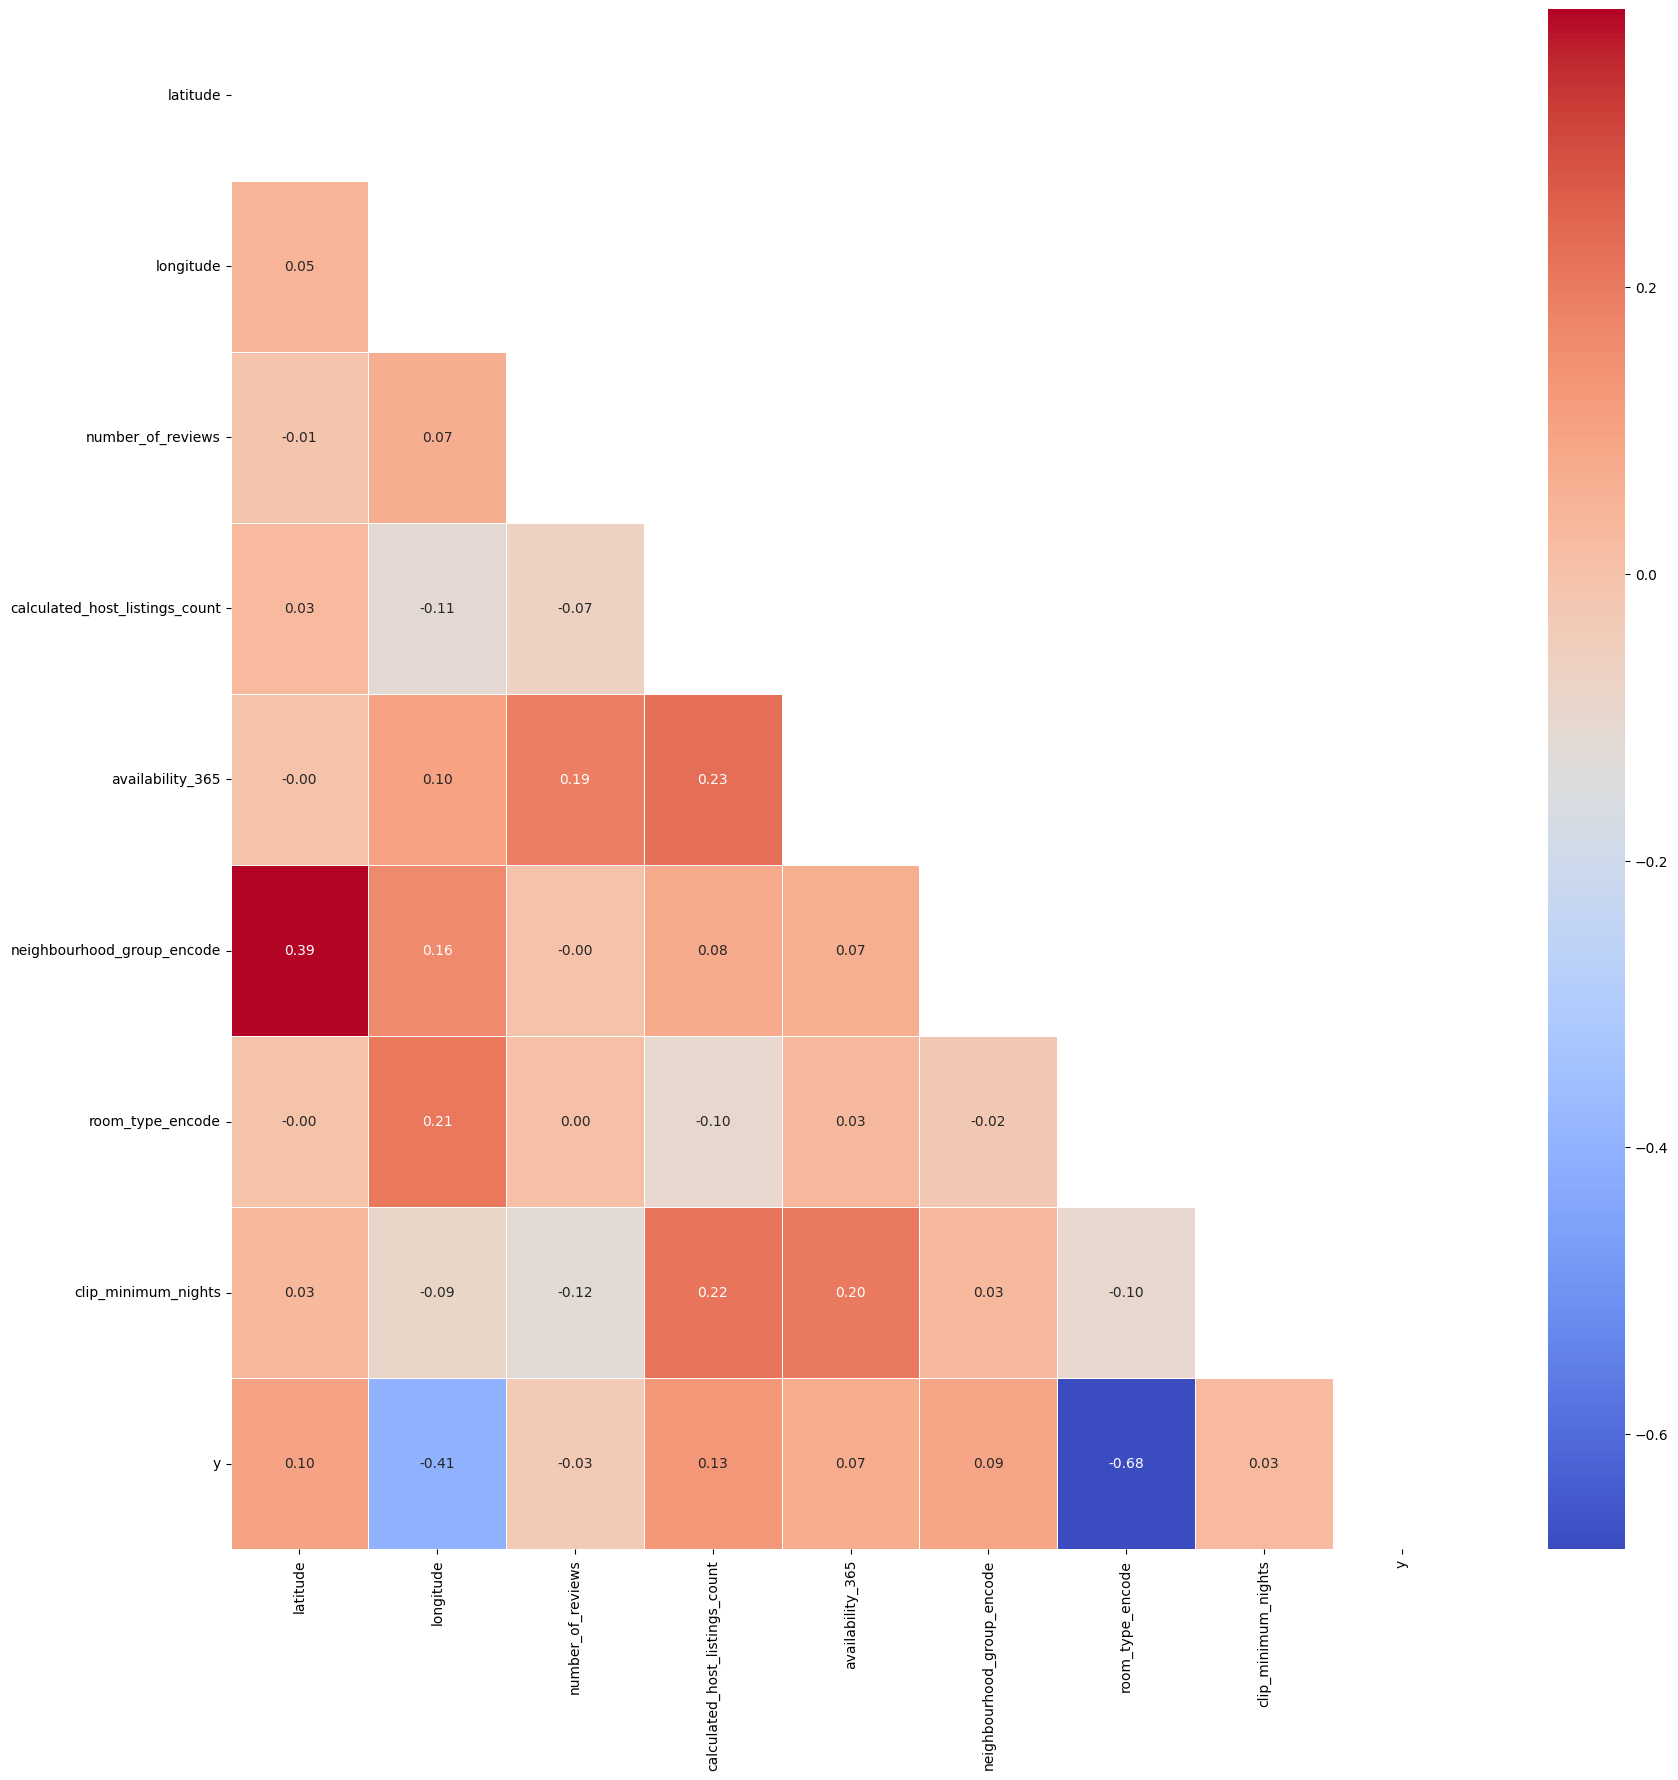

In [49]:
#Evaluación de correlaciones entre características
X_corr = X_train1.copy()
X_corr['y'] = y_train1
corr = X_corr.corr()

#Ocultamos la mitad de la matriz para no ver los valores duplicados
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(20,20))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

#### **Observaciones:**


In [50]:
# Medir colinealidad de las variables para el modelo predictivo de regresión (Variance Inflation Factor)
vif = pd.Series([variance_inflation_factor(X_train1.corr().values, i) for i in range(X_train1.corr().shape[1])], index=X_train1.columns)
vif

latitude                          1.892059
longitude                         1.514007
number_of_reviews                 1.343970
calculated_host_listings_count    1.587882
availability_365                  1.812545
neighbourhood_group_encode        2.135354
room_type_encode                  1.273779
clip_minimum_nights               1.527433
dtype: float64

### **Observaciones**
Dado que la mayoría de los valores es cercano a 1, podría decirse que entre ellas no existe colinealidad. Cuestión que nos permite avanzar para la toma de todas las variables en el estudio.

In [51]:
# Utilización de método escalador 
scaler = StandardScaler()

X_train_sc = pd.DataFrame(scaler.fit_transform(X_train1), columns=X_train1.columns, index=X_train1.index)
X_test_sc = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

### **Observaciones**
Utilizamos el método StandarScaler porque la mayoría de nuestros datos son categóricas y numéricas. No hay tanta existencia de valores binarios.

In [52]:
#Visualización de la nueva data para hacer el modelo predictivo 
X_test_sc

,latitude,longitude,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_encode,room_type_encode,clip_minimum_nights
id,,,,,,,,
317905,-1.619643,-0.607608,0.902166,-0.182283,0.613782,-0.928707,-0.926943,-0.273462
34205267,-0.430116,1.065095,-0.536690,-0.182283,-0.279240,1.921187,0.926298,1.174609
12342297,0.596963,-0.903761,-0.142165,-0.182283,-0.841228,0.496240,0.926298,-0.353910
33527778,-0.411836,-1.389939,-0.420654,11.096517,1.252755,0.496240,-0.926943,-0.353910
13136376,1.264470,0.465618,0.159530,-0.182283,-0.610274,0.496240,-0.926943,-0.353910
...,...,...,...,...,...,...,...,...
16315292,-0.076386,-0.930771,-0.118958,-0.182283,-0.317733,0.496240,-0.926943,-0.353910
34485698,0.641439,-0.727838,-0.536690,-0.009295,1.422122,0.496240,0.926298,-0.434359
29081010,0.558895,2.840340,-0.420654,-0.078490,-0.802736,1.921187,0.926298,-0.434359


### Modelo listo para ser ejecutado